In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# load data from the csv file
data = pd.read_csv('Complete_data.csv')

In [3]:
# select the input features and output variable
X = data[['RAINFALL', 'PRE DAY RAINFALL','EVAPORATION']].values
y = data['RIVER FLOW'].values

In [4]:
# normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

In [5]:
# reshape the input data to 3D for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [6]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 0.0093 - 1s/epoch - 109ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0088 - 32ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0083 - 31ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0079 - 35ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0075 - 34ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0071 - 29ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0068 - 27ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0064 - 26ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0061 - 30ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0058 - 27ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0054 - 27ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0053 - 31ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 0.0049 - 31ms/epoch - 2ms/step
Epoch 14/100
13/13 - 0s - loss: 0.0047 - 26ms/epoch - 2ms/step
Epoch 15/100
13/13 - 0s - loss: 0.0046 - 28ms/epoch - 2ms/step
Epoch 16/100
13/13 - 0s - loss: 0.0044 - 26ms/epoch - 2ms/step
E

In [9]:
# make predictions on the test data
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [10]:
# rescale the predicted values back to the original scale
y_pred = scaler.inverse_transform(y_pred)

In [11]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 0.005804096348583698


In [12]:
y_test = scaler.inverse_transform(y_test)

In [13]:
y_test


array([[  20.06],
       [  11.6 ],
       [  41.79],
       [   7.49],
       [  12.59],
       [   6.29],
       [  11.74],
       [   8.82],
       [ 265.54],
       [   6.43],
       [   6.08],
       [   8.83],
       [  12.48],
       [ 946.96],
       [  17.72],
       [  23.09],
       [   6.24],
       [   8.52],
       [   7.29],
       [   9.12],
       [   6.1 ],
       [  32.71],
       [  15.67],
       [  12.15],
       [  19.57],
       [  11.4 ],
       [   6.03],
       [ 264.02],
       [   9.08],
       [  71.95],
       [   6.53],
       [  26.5 ],
       [   7.96],
       [  12.59],
       [1784.1 ],
       [  15.93],
       [   9.38],
       [  25.52],
       [   6.43],
       [ 266.83],
       [   6.24],
       [   7.13],
       [   5.93],
       [  78.06],
       [  50.07],
       [   6.83],
       [  23.94],
       [  73.23],
       [   8.77],
       [  37.44],
       [   6.2 ],
       [  19.57],
       [   7.02],
       [   9.44],
       [  32.58],
       [ 1

In [14]:
y_pred

array([[-8.29012203e+00],
       [ 4.07027550e+01],
       [ 3.80299988e+01],
       [-1.32478304e+01],
       [-1.24747629e+01],
       [-1.47890463e+01],
       [-1.48045158e+01],
       [ 1.54440260e+00],
       [ 6.83811951e+02],
       [-1.41325417e+01],
       [-1.08949537e+01],
       [-1.29702148e+01],
       [ 1.33047056e+00],
       [ 5.97171509e+02],
       [-1.53435011e+01],
       [-7.63338137e+00],
       [ 5.06629601e+01],
       [ 1.73266449e+02],
       [ 4.77275276e+01],
       [-1.57120037e+01],
       [-1.13740044e+01],
       [ 1.03182659e+01],
       [ 1.44562393e+02],
       [-2.62395787e+00],
       [ 1.62263680e+01],
       [-1.50267677e+01],
       [-1.17684612e+01],
       [ 1.48976599e+03],
       [ 1.65954941e+02],
       [ 1.23917801e+02],
       [ 1.95378685e+01],
       [-3.81679749e+00],
       [-1.43557281e+01],
       [-1.47949152e+01],
       [ 8.57608459e+02],
       [ 4.83864632e+01],
       [-2.14982486e+00],
       [ 7.16874266e+00],
       [-1.0

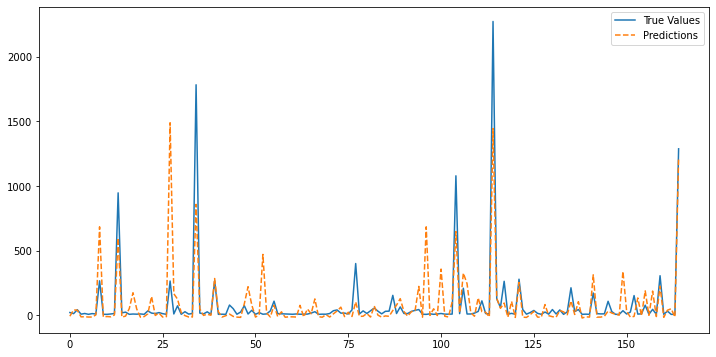

In [15]:
# plot the actual and predicted values
import matplotlib.pyplot as plt
plt.plot(y_test, linestyle='-', label='True Values')  # solid line
plt.plot(y_pred, linestyle='--', label='Predictions')  # dotted line
plt.legend()  # show the legend
fig = plt.gcf()
fig.set_size_inches(12, 6) 
plt.savefig('result.png', format="png", dpi=2400)
plt.show()

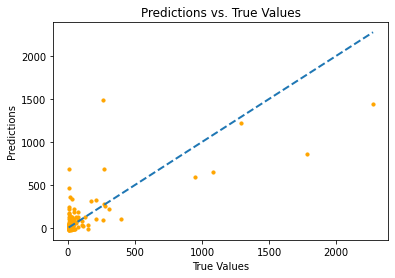

In [16]:
plt.scatter(y_test, y_pred, s=10, c='orange')  # set the marker size to 10
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', linewidth=2)
fig.set_size_inches(12, 6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()

In [17]:
#Evaluation of LSTM model using R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.5769157837208913


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [19]:
X = data[['RAINFALL', 'PRE DAY RAINFALL','EVAPORATION']]
y = data['RIVER FLOW']

In [20]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
lr_model = LinearRegression()

# train the model on the training set
lr_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr_model.predict(X_test)

# evaluate the Linear Regression model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


R-squared Score: 0.24997461527786569
